<a href="https://colab.research.google.com/github/arcrowell/Decision-Optimization-Simulation/blob/main/crowell_dos_ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Set 4

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import random as rand
from sklearn.linear_model import LinearRegression

##Problem 1

In [3]:
#Simulate rolling an 8-sided die five times and store the values in a list called sample.

sample = []
for i in range(5):
  roll = rand.randint(1,8)
  sample.append(roll)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

print(f'The mean of 5 rolls of an 8-sided die: {sample_mean}')
print(f'The standard deviation of 5 rolls of an 8-sided die: {sample_std}')

The mean of 5 rolls of an 8-sided die: 3.6
The standard deviation of 5 rolls of an 8-sided die: 3.2093613071762426


##Problem 2

In [4]:
roll_means = []

for i in range(10000):
  sum_rolls = np.random.randint(1, 9, size=5)
  roll_means.append(np.mean(sum_rolls))

sim_mean = np.mean(roll_means)

print(f'The mean of 10,000 simulations of 5 rolls of an 8-sided die is: {sim_mean}')

The mean of 10,000 simulations of 5 rolls of an 8-sided die is: 4.5062


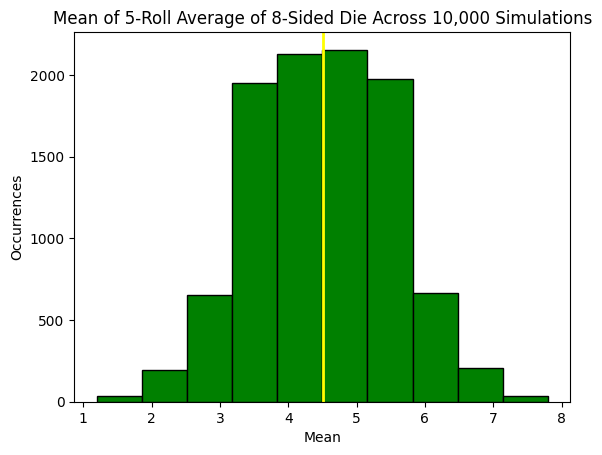

In [5]:
plt.hist(roll_means, color='green', edgecolor='black')
plt.title('Mean of 5-Roll Average of 8-Sided Die Across 10,000 Simulations')
plt.xlabel('Mean')
plt.ylabel('Occurrences')
plt.axvline(sim_mean, color='yellow', linewidth=2)
plt.show()

##Problem 3

In [6]:
lower_bound = np.quantile(sample, 0.025)
upper_bound = np.quantile(sample, 0.975)

print(lower_bound)
print(upper_bound)

1.0
7.8


##Problem 4

In [7]:
lower_clt = sample_mean - (2.776 * (sample_std/np.sqrt(5)))
upper_clt = sample_mean + (2.776 * (sample_std/np.sqrt(5)))

print(lower_clt)
print(upper_clt)

-0.38430954620747215
7.584309546207472


##Problem 5

In [8]:
qtile_prob = 0
for i in np.linspace(0, 1, 1001):
    if np.quantile(sample, i) >= 5.5:
        qtile_prob = i
        break

prob_over = 1 - qtile_prob

print(f'Probability of average over 5.5 is: {prob_over}')

Probability of average over 5.5 is: 0.281


##Problem 6

In [9]:
t_dist_prob = stats.t.sf(x=5.5, df = 4, loc = sample_mean, scale = sample_std)
print(f'Theoretical t-distribution for sample is: {t_dist_prob}')

Theoretical t-distribution for sample is: 0.29284026893184256


##Problem 7

https://raw.githubusercontent.com/ncrowder/DOS/main/heights.csv

In [10]:
#Load csv file from Github
df_hs = pd.read_csv("https://raw.githubusercontent.com/ncrowder/DOS/main/heights.csv")
df_hs

,us_heights,jockey_heights
0,70,64
1,65,65
2,72,66
3,71,62
4,73,70
5,66,64
6,62,58
7,71,67
8,72,68
9,69,63


In [11]:
melted = df_hs.melt(value_vars=['us_heights','jockey_heights'], value_name='heights')
all_heights = melted['heights']
all_heights

,heights
0,70
1,65
2,72
3,71
4,73
5,66
6,62
7,71
8,72
9,69


In [36]:
sim_diffs = []
for i in range(500):
  perm_sample = np.random.permutation(all_heights)
  perm_us, perm_jockey = perm_sample[:10], perm_sample[10:]
  perm_diff = np.mean(perm_us) - np.mean(perm_jockey)
  sim_diffs.append(perm_diff)

print(f'Difference in means: {perm_diff}')

Difference in means: 0.7999999999999972


##Problem 8

Is it justifiable to assume that the heights are the same?
*   Yes, it is justifiable to assume the heights are the same given the sample mean is inside the CI.


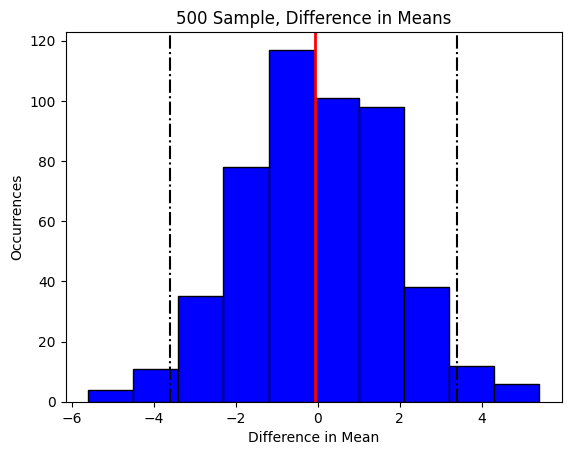

In [13]:
plt.hist(sim_diffs, color='blue', edgecolor='black')
plt.title('500 Sample, Difference in Means')
plt.xlabel('Difference in Mean')
plt.ylabel('Occurrences')
mean_sim_diffs = np.mean(sim_diffs)
plt.axvline(mean_sim_diffs, color='red', linewidth=2)
lower = np.quantile(sim_diffs,.025)
upper = np.quantile(sim_diffs,.975)
plt.axvline(lower,color='black',linestyle='-.')
plt.axvline(upper,color='black',linestyle='-.')
plt.show()

##Problem 9

In [14]:
bag1 = [[1,2,3,4,4,-4],[1,-2,3,4,5,-6]]
bag2 = [[1,2,3,4,5,5],[1,-2,3,4,5,6],[1,1,1,-5,5,6]]
bag3 = [[1,2,3,-3,4,-4],[1,2,3,4,5,-6]]

results = []
for i in range(5000):
  bag_index1 = rand.randint(0, len(bag1)-1)
  bag_index2 = rand.randint(0, len(bag2)-1)
  bag_index3 = rand.randint(0, len(bag3)-1)
  point1 = rand.choice(bag1[bag_index1])
  point2 = rand.choice(bag2[bag_index2])
  point3 = rand.choice(bag3[bag_index3])

  sum_rolls3 = point1 + point2 + point3
  results.append(sum_rolls3)

qtile_prob = 0
for i in np.linspace(0, 1, 1001):
    if np.quantile(results, i) >= 0:
        qtile_prob = i
        break

prob_gajillion = qtile_prob
print(f'Probability of winning a gajillion dollars is: {prob_gajillion}')

Probability of winning a gajillion dollars is: 0.169


##Problem 10

In [15]:
accidents = stats.multivariate_normal.rvs(mean=3, size=120, random_state=2026)

count_zero = sum(1 for x in accidents if x<= 0)
count_four_plus = sum(1 for x in accidents if x >= 4)

prob_zero_or_four_plus = (count_zero + count_four_plus) / 120
print(f'Probability of 0 or 4 or more accidents occuring in a single month: {prob_zero_or_four_plus}')

Probability of 0 or 4 or more accidents occuring in a single month: 0.15


##Problem 11

In [16]:
dia = pd.read_csv('https://raw.githubusercontent.com/ncrowder/DOS/main/diabetes.csv')
dia.head(5)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [17]:
corr_diabetes = dia.corr()['y'].abs()
corr_diabetes

,y
age,0.187889
sex,0.043062
bmi,0.586450
bp,0.441482
tc,0.212022
ldl,0.174054
hdl,0.394789
tch,0.430453
ltg,0.565883
glu,0.382483


In [18]:
#bp and glu are largest correlation to age
x = dia[['ltg','bmi']]
y = dia['y']

model_dia = LinearRegression().fit(x,y)

##Problem 12

In [19]:
mean_dia = dia[['ltg','bmi']].mean()
cov_dia = dia[['ltg','bmi']].cov()

##Problem 13

In [20]:
sim_results = stats.multivariate_normal.rvs(mean=mean_dia, size=5000, cov=cov_dia)
df_sim = pd.DataFrame(sim_results, columns=['ltg','bmi'])

df_sim.head(5)

,ltg,bmi
0,3.976481,26.594918
1,5.265622,26.321200
2,4.611353,31.147356
3,5.216548,36.302367
4,4.550735,24.226462


##Problem 14

In [21]:
df_sim['predicted_y'] = model_dia.predict(df_sim)

df_sim.head(5)

,ltg,bmi,predicted_y
0,3.976481,26.594918,116.454298
1,5.265622,26.321200,186.727278
2,4.611353,31.147356,185.166436
3,5.216548,36.302367,256.599367
4,4.550735,24.226462,131.411974


##Problem 15


In [22]:
y_diffs = []
ltg_q20s = []
ltg_q80s = []
bmi_q20s = []
bmi_q80s = []
q80_outcomes = []
q20_outcomes = []
for i in range(500):
  sim_results = stats.multivariate_normal.rvs(mean=mean_dia, size=500, cov=cov_dia)
  df_sim = pd.DataFrame(sim_results, columns = ['ltg','bmi'])
  y_pred = model_dia.predict(df_sim)
  df_sim['y_pred'] = y_pred
  ltg_q20 = np.quantile(df_sim["ltg"], 0.20)
  ltg_q80 = np.quantile(df_sim["ltg"], 0.80)
  bmi_q20 = np.quantile(df_sim["bmi"], 0.20)
  bmi_q80 = np.quantile(df_sim["bmi"], 0.80)
  q80 = df_sim[(df_sim.ltg > ltg_q80) & (df_sim.bmi > bmi_q80)]
  q20 = df_sim[(df_sim.ltg < ltg_q20) & (df_sim.bmi < bmi_q20)]
  q80_outcome = np.mean(q80['y_pred'])
  q20_outcome = np.mean(q20['y_pred'])
  y_diff = q80_outcome - q20_outcome
  ltg_q20s.append(ltg_q20)
  ltg_q80s.append(ltg_q80)
  bmi_q20s.append(bmi_q20)
  bmi_q80s.append(bmi_q80)
  q80_outcomes.append((f'patients: {q80.shape[0]}',f'difference: {q80_outcome}'))
  q20_outcomes.append((f'patients: {q20.shape[0]}',f'difference: {q20_outcome}'))
  y_diffs.append(y_diff)

max_mean = max(y_diffs)
min_mean = min(y_diffs)
range_mean = max_mean - min_mean
print(f'Mean difference in outcomes: {np.mean(y_diffs)}')
print(f'Range of mean difference in outcomes: {range_mean}')

Mean difference in outcomes: 183.94066378625325
Range of mean difference in outcomes: 36.13750862124712


##Problem 16

In [52]:
dist_samp = stats.triang.rvs(c=0.5, loc=-1, scale=2, size=1000) + stats.norm.rvs(loc=0, scale=0.1, size=1000)

In [53]:
dists = [stats.expon, stats.laplace, stats.triang, stats.norm]

for dist in dists:
  par = dist.fit(dist_samp)
  mle = dist.nnlf(par, dist_samp)
  print(f'{dist.name}: {mle}')

#The best fitting distribution is triangular.

expon: 1037.9966018786558
laplace: 615.3558899570469
triang: 526.137099762637
norm: 537.2426624730887


##Problem 17

In [65]:
x = stats.expon.rvs(size=1000, random_state=2026) + stats.norm.rvs(size=1000, loc=0, scale=0.9, random_state=2026)
z = stats.norm.rvs(size=1000, random_state=2026) #fixed sample

for dist in dists:
  par = dist.fit(x)
  mle = dist.nnlf(par, x)
  print(f'Noisy nnlfs: {dist.name}: {mle}')

print()
for dist in dists:
  par = dist.fit(z)
  mle = dist.nnlf(par, z)
  print(f'Fixed nnlfs: {dist.name}: {mle}')

Noisy nnlfs: expon: 2293.0388283356438
Noisy nnlfs: laplace: 1638.952135460627
Noisy nnlfs: triang: 1941.6314183603658
Noisy nnlfs: norm: 1644.996795589044

Fixed nnlfs: expon: 2207.9908982385346
Fixed nnlfs: laplace: 1485.9722819278531
Fixed nnlfs: triang: 1552.0357675936534
Fixed nnlfs: norm: 1445.151784946267


###Manual calculation, increasing omega by 0.05 yields a noise factor of 1.1 for norm to become the smallest nnlf. When checking backwards by 0.01 from that point it seems to crossing point is when omega is 0.9 for the noise factor.